In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JinL-Zhang/Schulich_MBAN-6110-Data_Science-/main/Loan_Approval_Prediction/loan_approval_dataset.csv')
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.describe(include='all')

loan_id   no_of_dependents  education  self_employed  \
count   4269.000000        4269.000000       4269           4269   
unique          NaN                NaN          2              2   
top             NaN                NaN   Graduate            Yes   
freq            NaN                NaN       2144           2150   
mean    2135.000000           2.498712        NaN            NaN   
std     1232.498479           1.695910        NaN            NaN   
min        1.000000           0.000000        NaN            NaN   
25%     1068.000000           1.000000        NaN            NaN   
50%     2135.000000           3.000000        NaN            NaN   
75%     3202.000000           4.000000        NaN            NaN   
max     4269.000000           5.000000        NaN            NaN   

         income_annum   loan_amount    loan_term   cibil_score  \
count    4.269000e+03  4.269000e+03  4269.000000   4269.000000   
unique            NaN           NaN          NaN           NaN   
top               NaN           NaN          NaN           NaN   
freq              NaN           NaN          NaN           NaN   
mean     5.059124e+06  1.513345e+07    10.900445    599.936051   
std      2.806840e+06  9.043363e+06     5.709187    172.430401   
min      2.000000e+05  3.000000e+05     2.000000    300.000000   
25%      2.700000e+06  7.700000e+06     6.000000    453.000000   
50%      5.100000e+06  1.450000e+07    10.000000    600.000000   
75%      7.500000e+06  2.150000e+07    16.000000    748.000000   
max      9.900000e+06  3.950000e+07    20.000000    900.000000   

         residential_assets_value   commercial_assets_value  \
count                4.269000e+03              4.269000e+03   
unique                        NaN                       NaN   
top                           NaN                       NaN   
freq                          NaN                       NaN   
mean                 7.472617e+06              4.973155e+06   
std                  6.503637e+06              4.388966e+06   
min                 -1.000000e+05              0.000000e+00   
25%                  2.200000e+06              1.300000e+06   
50%                  5.600000e+06              3.700000e+06   
75%                  1.130000e+07              7.600000e+06   
max                  2.910000e+07              1.940000e+07   

         luxury_assets_value   bank_asset_value  loan_status  
count           4.269000e+03       4.269000e+03         4269  
unique                   NaN                NaN            2  
top                      NaN                NaN     Approved  
freq                     NaN                NaN         2656  
mean            1.512631e+07       4.976692e+06          NaN  
std             9.103754e+06       3.250185e+06          NaN  
min             3.000000e+05       0.000000e+00          NaN  
25%             7.500000e+06       2.300000e+06          NaN  
50%             1.460000e+07       4.600000e+06          NaN  
75%             2.170000e+07       7.100000e+06          NaN  
max             3.920000e+07       1.470000e+07          NaN

### Note that the feature 'residential_assets_value' has negative value '-1.000000e+05', which is not reasonable and may attributed to human error during data collection, and so we will firstly drop out the records with negative 'residential_assets_value'. NOtiece that only 20 records out of 4000 records are dropped due to their negative residential_assets_value, meaning that the model performance should not be compromised due to less training records. Instead, with less noises in the dataset, the training of the models may even become more efficient and yield better results

In [ ]:
df = df[df[' residential_assets_value'] >= 0]
df

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4241 rows x 13 columns]

# EDA, Missing Value Handling, Outlier Detection, Statistical Testing

## Step 1, rename columns

Most columns' names starting with a ' ', which will be removed in this step.

In [ ]:
# remove the unncessary white space in the column name
new_column_names = {i: i.strip() for i in df.columns}
df.rename(columns=new_column_names, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4241 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4241 non-null   int64 
 1   no_of_dependents          4241 non-null   int64 
 2   education                 4241 non-null   object
 3   self_employed             4241 non-null   object
 4   income_annum              4241 non-null   int64 
 5   loan_amount               4241 non-null   int64 
 6   loan_term                 4241 non-null   int64 
 7   cibil_score               4241 non-null   int64 
 8   residential_assets_value  4241 non-null   int64 
 9   commercial_assets_value   4241 non-null   int64 
 10  luxury_assets_value       4241 non-null   int64 
 11  bank_asset_value          4241 non-null   int64 
 12  loan_status               4241 non-null   object
dtypes: int64(10), object(3)
memory usage: 463.9+ KB


## Step 2, rename values

seems like some object type columns have values starting with ' ', which will be removed in this step.

In [ ]:
# check for values that contain white space
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [ ]:
df['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [ ]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [ ]:
# remove the white space
df['self_employed'] = df['self_employed'].str.strip()
df['education'] = df['education'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

In [ ]:
print(df['self_employed'].unique())
print(df['education'].unique())
print(df['loan_status'].unique())

['No' 'Yes']
['Graduate' 'Not Graduate']
['Approved' 'Rejected']


## Step 3, checking data and looking for outliers

<Axes: xlabel='no_of_dependents', ylabel='Count'>

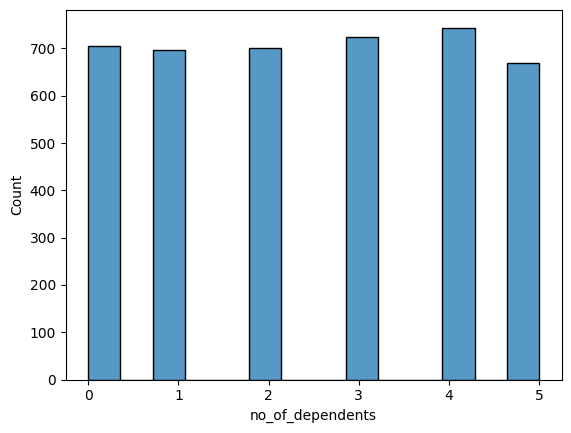

In [ ]:
# using plots to check for outliers in each column
sns.histplot(data = df, x = 'no_of_dependents')

<Axes: xlabel='self_employed', ylabel='Count'>

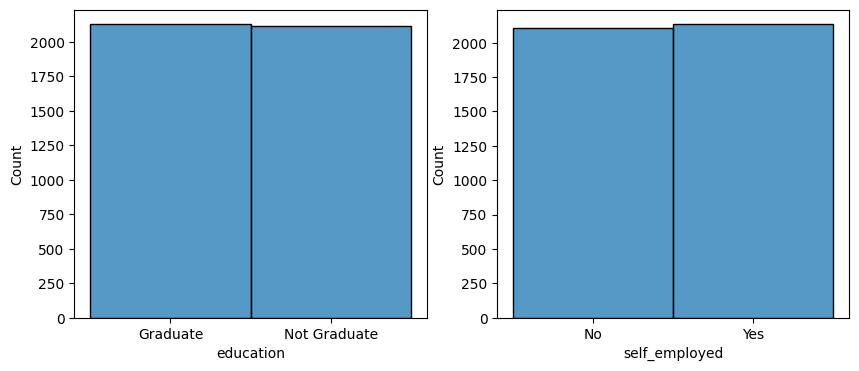

In [ ]:
# seems like education and self-employed status are balanced
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
sns.histplot(data = df, x = 'education', ax=ax1)
sns.histplot(data = df, x = 'self_employed', ax=ax2)


<Axes: xlabel='loan_amount', ylabel='Count'>

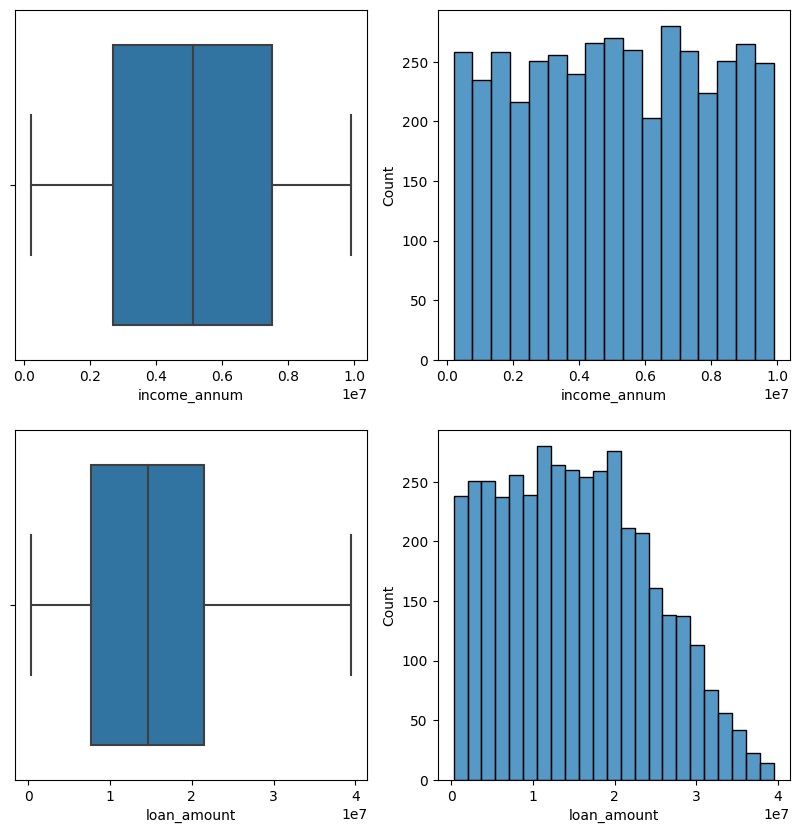

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,10))
sns.boxplot(data = df, x = 'income_annum', ax=ax1)
sns.histplot(data = df, x = 'income_annum',ax=ax2)
sns.boxplot(data = df, x = 'loan_amount', ax=ax3)
sns.histplot(data = df, x = 'loan_amount',ax=ax4)

seems like loan_amount is right skewed

<Axes: xlabel='residential_assets_value', ylabel='Count'>

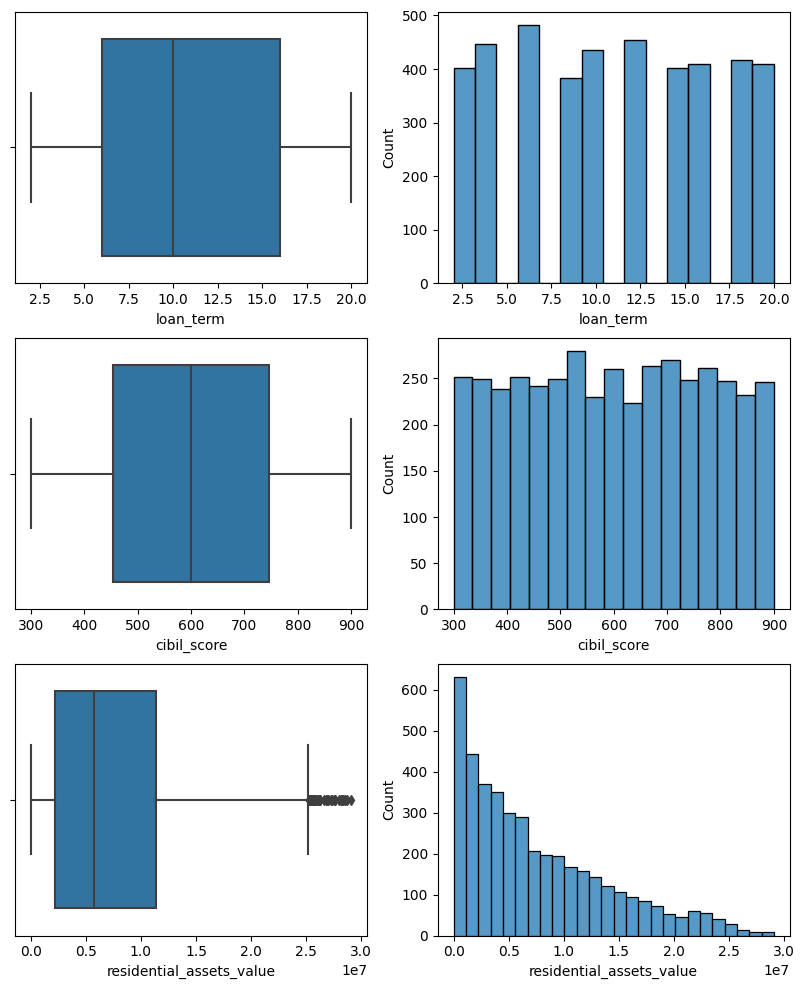

In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(10,12))
sns.boxplot(data = df, x = 'loan_term',ax=ax1)
sns.histplot(data = df, x = 'loan_term',ax=ax2)
sns.boxplot(data = df, x = 'cibil_score',ax=ax3)
sns.histplot(data = df, x = 'cibil_score',ax=ax4)
sns.boxplot(data = df, x = 'residential_assets_value',ax=ax5)
sns.histplot(data = df, x = 'residential_assets_value',ax=ax6)

In [ ]:
df[df['residential_assets_value'] > 2.6e7].head()

loan_id  no_of_dependents     education self_employed  income_annum  \
123      124                 0  Not Graduate           Yes       9000000   
714      715                 4  Not Graduate            No       9900000   
781      782                 3  Not Graduate           Yes       9900000   
892      893                 4      Graduate            No       9300000   
905      906                 5  Not Graduate            No       9700000   

     loan_amount  loan_term  cibil_score  residential_assets_value  \
123     18700000         18          865                  26800000   
714     22700000         12          567                  28300000   
781     20400000          4          865                  26300000   
892     24900000         14          455                  27600000   
905     37000000         14          459                  28700000   

     commercial_assets_value  luxury_assets_value  bank_asset_value  \
123                        0             20900000          11300000   
714                  9900000             29700000           5400000   
781                  3600000             36500000          12800000   
892                  4700000             35100000          13900000   
905                 17900000             22800000           5600000   

    loan_status  
123    Approved  
714    Approved  
781    Approved  
892    Rejected  
905    Rejected

seems like there is a few outliers in residential_assets_value column, however we believe they are reliable and relevant to loan approval evaluation, thus we decided to keep them.

<Axes: xlabel='bank_asset_value', ylabel='Count'>

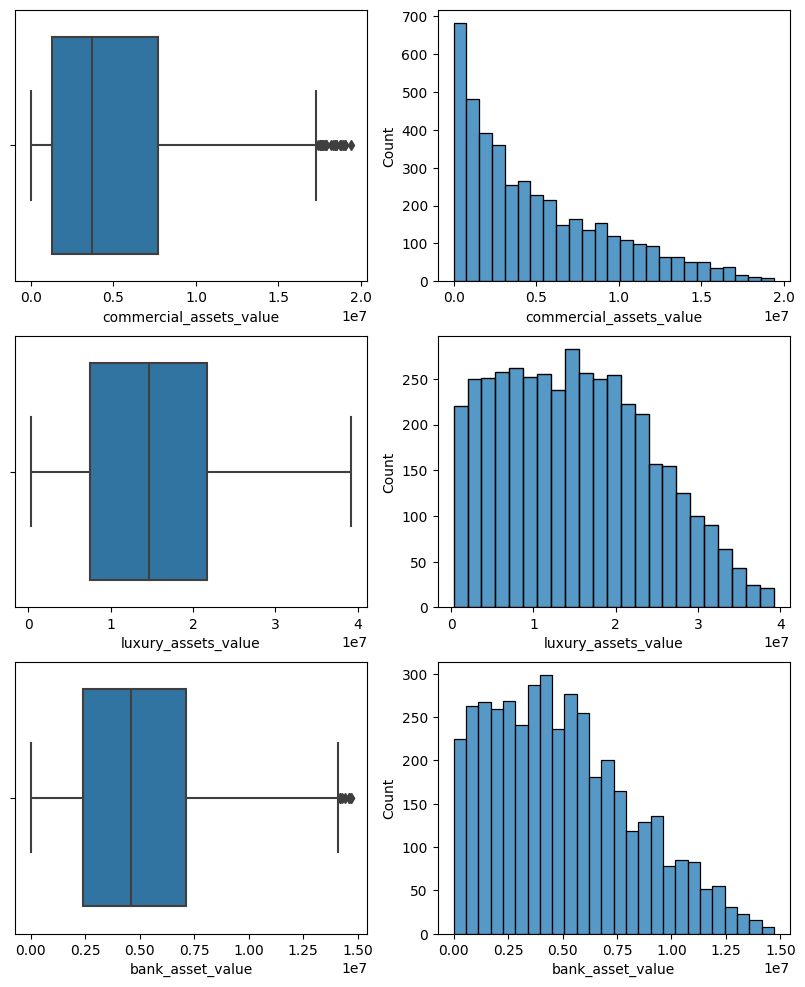

In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(10,12))
sns.boxplot(data = df, x = 'commercial_assets_value',ax=ax1)
sns.histplot(data = df, x = 'commercial_assets_value',ax=ax2)
sns.boxplot(data = df, x = 'luxury_assets_value',ax=ax3)
sns.histplot(data = df, x = 'luxury_assets_value',ax=ax4)
sns.boxplot(data = df, x = 'bank_asset_value',ax=ax5)
sns.histplot(data = df, x = 'bank_asset_value',ax=ax6)


seems like there are outliers in commercial_assets_value column, similarly we are keeping them.

these outliers in bank_asset_value column are not extreme, so we decided to keep them as well.

### As shown below, the binary target variable, 'loan_status', is slightly imbalanced, as we have more than 2500 records whose 'loan_status' is 'Approved', while only around 1500 loan applications are rejected, implying that the evaluation metric selected for the later model selection and model training should not be accuracy score solely, but including f1 score and roc_auc_score as well to yield better insights to the model performance.

### In addition, the imbalanced data may suggest that it is plasuible to use resampling methods for this task like under-sampling (reduces the number of instances from the over-represented classes to be equal to the number of minority class instances) and over-sampling (Bootstrapping more minority instances to the under-represented classes). However, since both of the under-sampling and oversampling have their own disadvantages (such as the overfiting problem in over-sampling due to the repeated minority instances in the training set), we will attempt to use more advanced resampling techniques like Synthetic Minority Over-sampling Technique (SMOTE), which is a more 'advanced' version of 'naive' over-sampling, because the new minority instances are not copied but synthesized from the existing minority samples based on the k-nearest neighbours. Thus, we will implement this technique in the data-preprocessing section  

To be more specific about the process of SMOTE, a random example from the minority class is firstly chosen. Then, k of the nearest neighbors of that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space. This approach is effective because new synthetic examples from the minority class are created relatively close in feature space to existing actual examples from the minority class.

Reference for SMOTE: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


<Axes: xlabel='loan_status', ylabel='Count'>

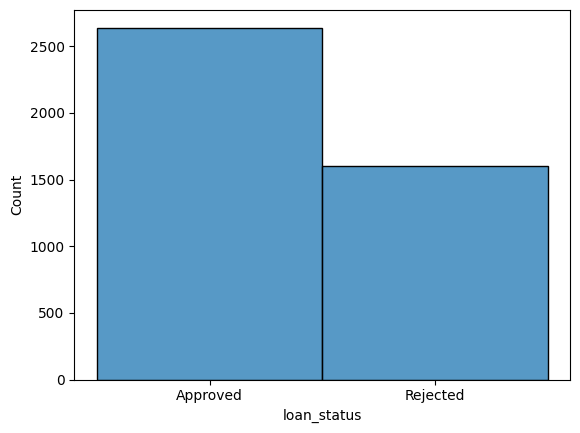

In [ ]:
sns.histplot(data = df, x = 'loan_status')

## Step 4, checking missing values

In [ ]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

there is no missing value! wonderful

## Step 5 (optional), drop useless column

In [ ]:
df.drop('loan_id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4241 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4241 non-null   int64 
 1   education                 4241 non-null   object
 2   self_employed             4241 non-null   object
 3   income_annum              4241 non-null   int64 
 4   loan_amount               4241 non-null   int64 
 5   loan_term                 4241 non-null   int64 
 6   cibil_score               4241 non-null   int64 
 7   residential_assets_value  4241 non-null   int64 
 8   commercial_assets_value   4241 non-null   int64 
 9   luxury_assets_value       4241 non-null   int64 
 10  bank_asset_value          4241 non-null   int64 
 11  loan_status               4241 non-null   object
dtypes: int64(9), object(3)
memory usage: 430.7+ KB


## Step 6, analyzing data

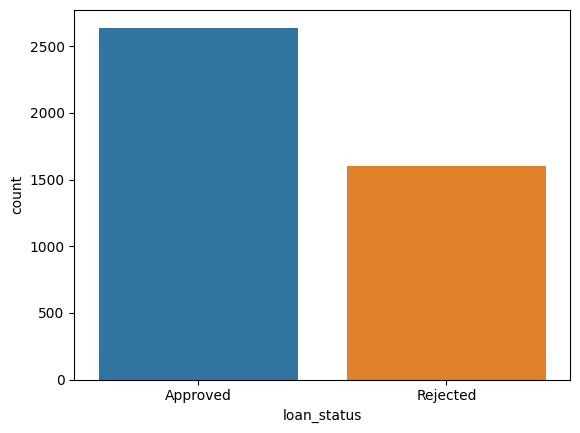

In [ ]:
sns.countplot(data=df, x='loan_status')
plt.show()

In [ ]:
# calculate approval rate
(df['loan_status'] == 'Approved').sum() / len(df['loan_status']) * 100

62.24946946474888

the approval rate in this dataset is about 62%

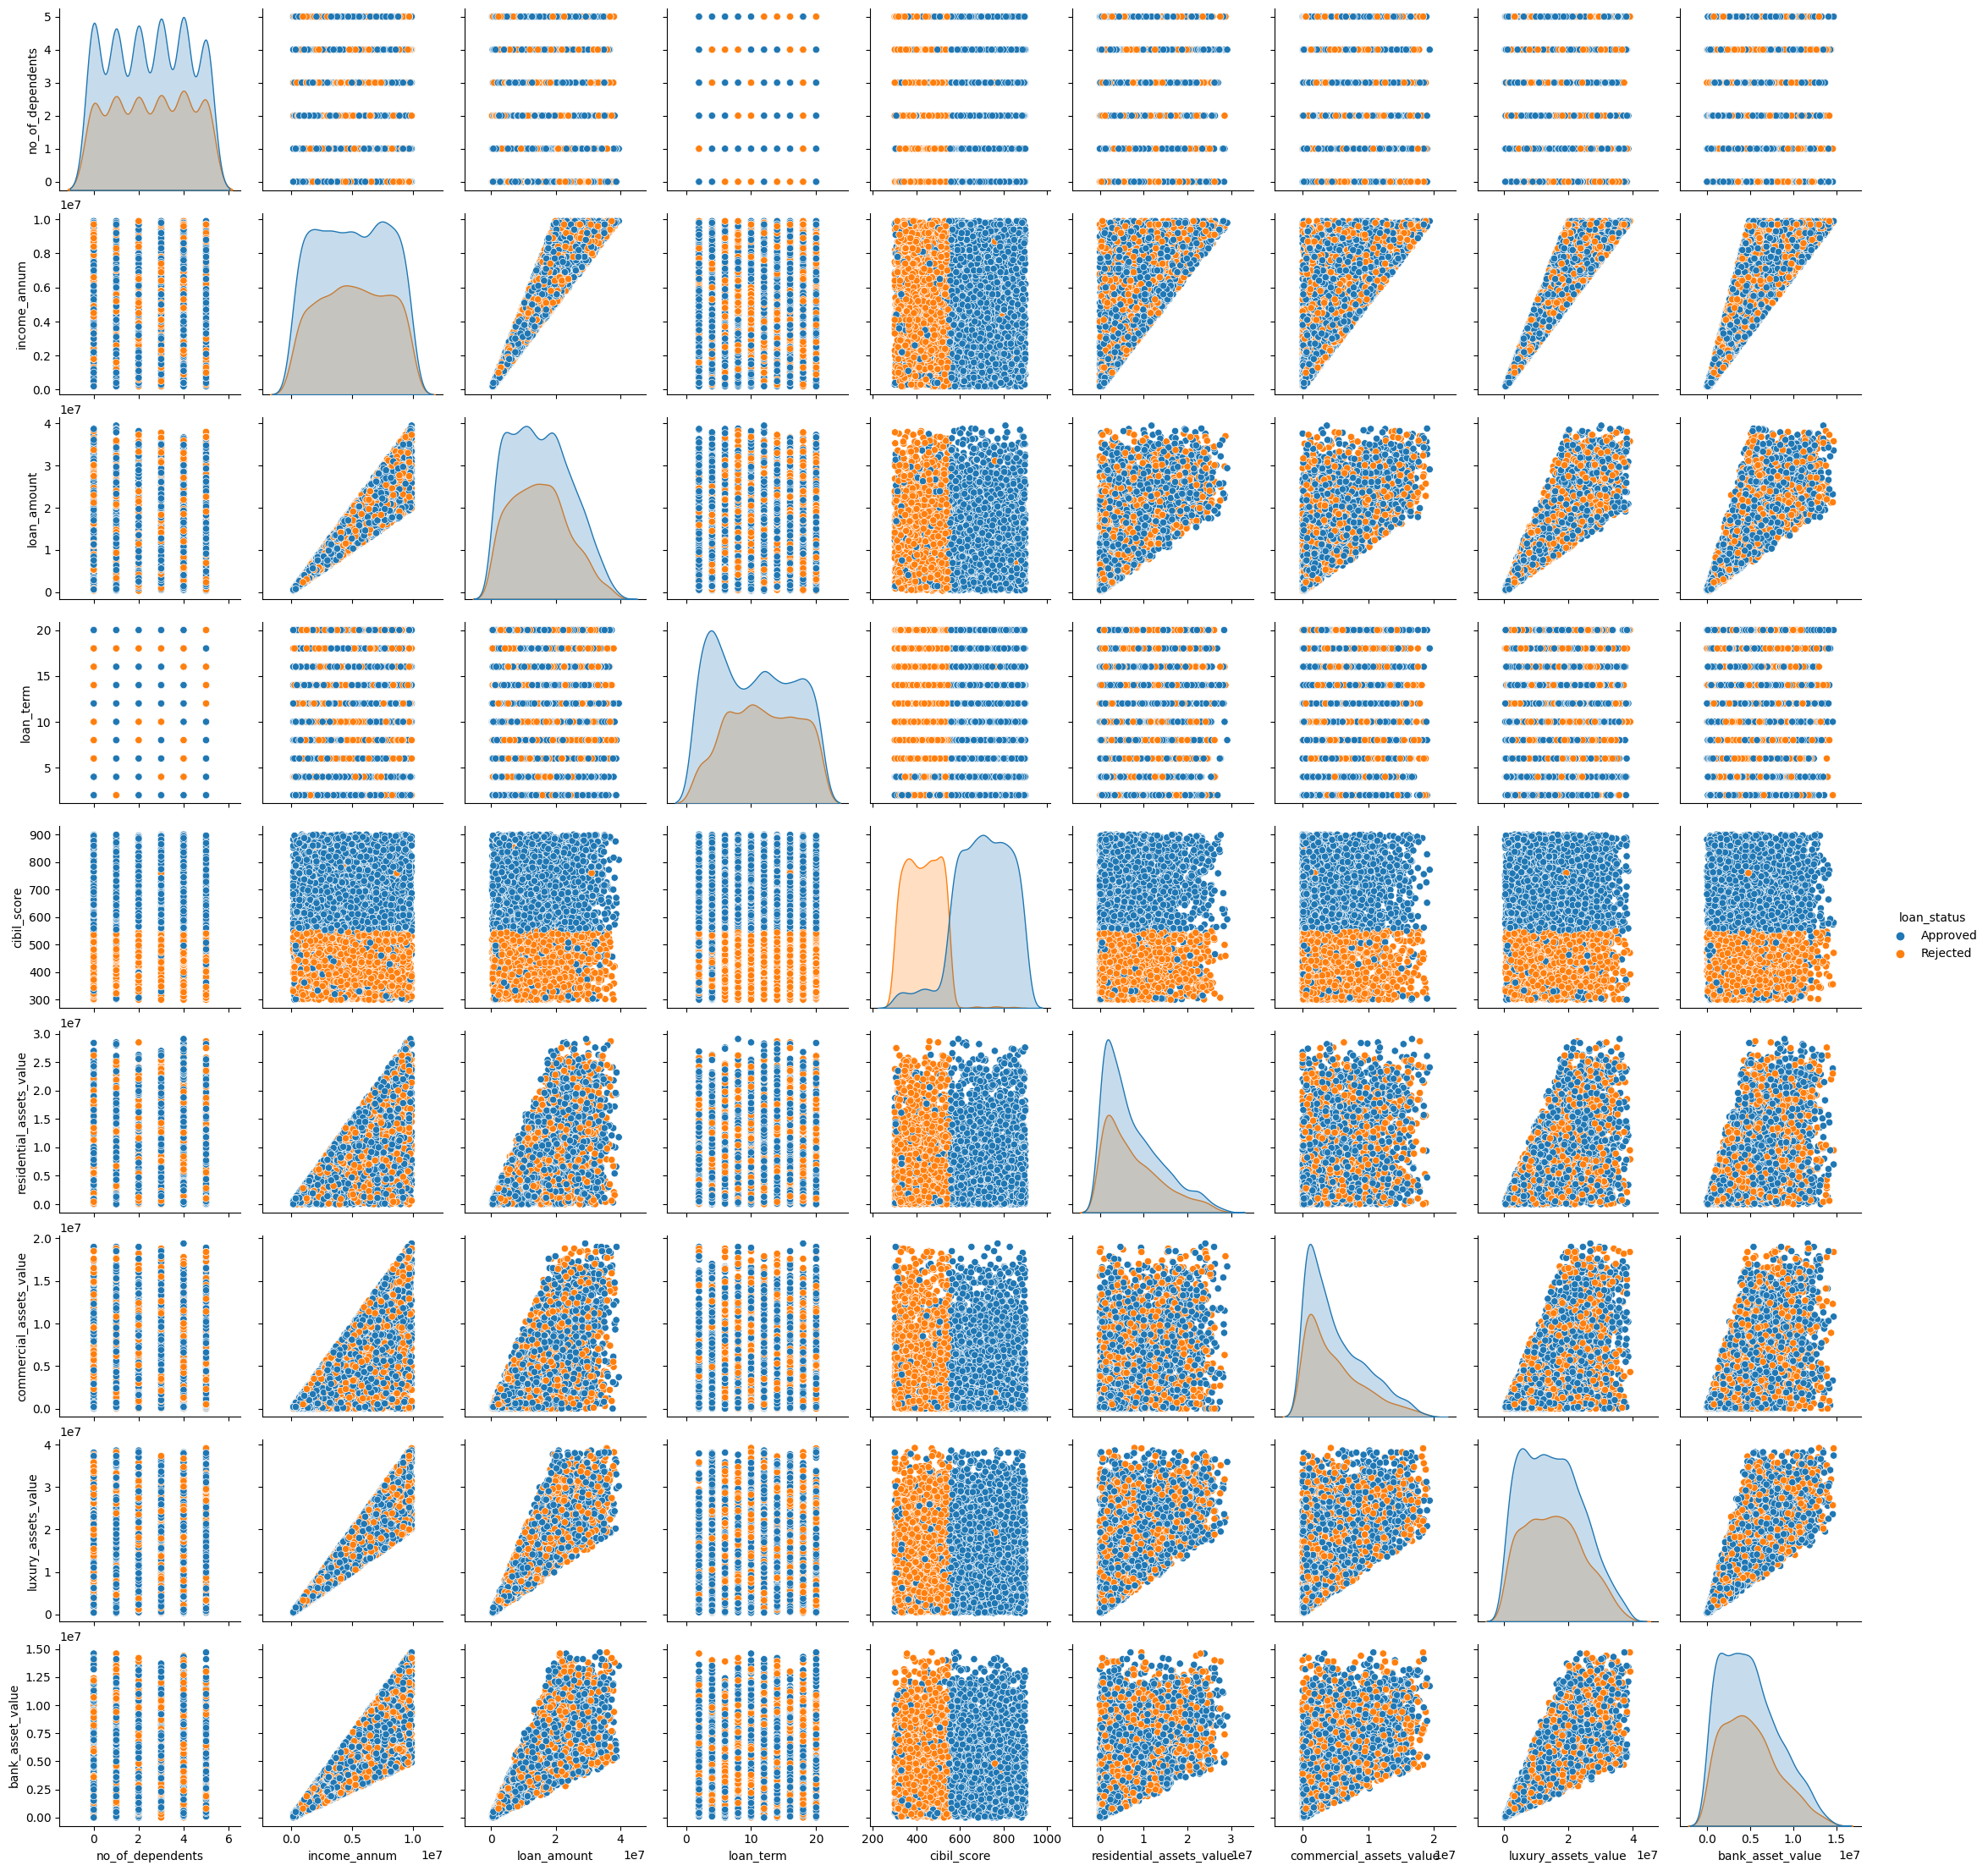

In [ ]:
# using pairplot to get an overview of the relationships of all columns with the loan_status
sns.pairplot(data=df, hue='loan_status')
plt.show()

seems like cibil_score is a determinant factor

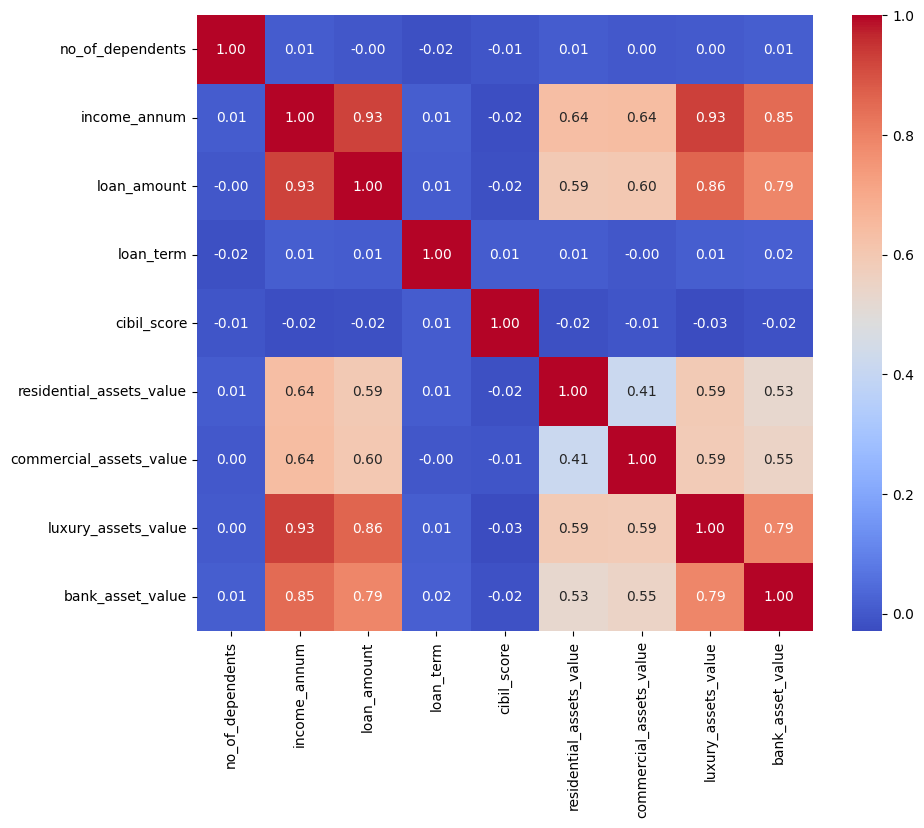

In [ ]:
# using heatmap to see the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['education', 'self_employed', 'loan_status'], axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

we'll define that a pair with a value of over 0.7 is highly correlated.
seems like the following pairs are highly correlated:
- income_annum & luxury_assets_value: 0.93
- income_annum & loan_amount: 0.93
- income_annum & bank_asset_value: 0.85
- loan_amount & luxury_assets_value: 0.86
- loan_amount & bank_asset_value: 0.79
- luxury_assets_value & bank_asset_value: 0.79

let's visualize them

As indicated by the below pairplot, a key insight we can generate is that the feature 'cibil_score' is a strong differentiator for the records whose 'loan_status' is approved, and the records whose 'loan_status' is rejected, because all the scatter plots related to 'cibil_score' such as 'cibil_score vs income_annum' and 'cibil_score vs loan_amount' are visually linearly separable, meaning that by simply finding a threshold in the 'cibil_score', we can determine the levels of an application's annual income, loan amount, luxury asset value, and bank asset value with a satisfactory accuracy socre

This insight may also suggest that we can train a simple logistic regression model on the 'cibil_score' feature solely as a baseline model to know what is the minimal model performance we should expect, and what direction we should approach to solve the given problem.

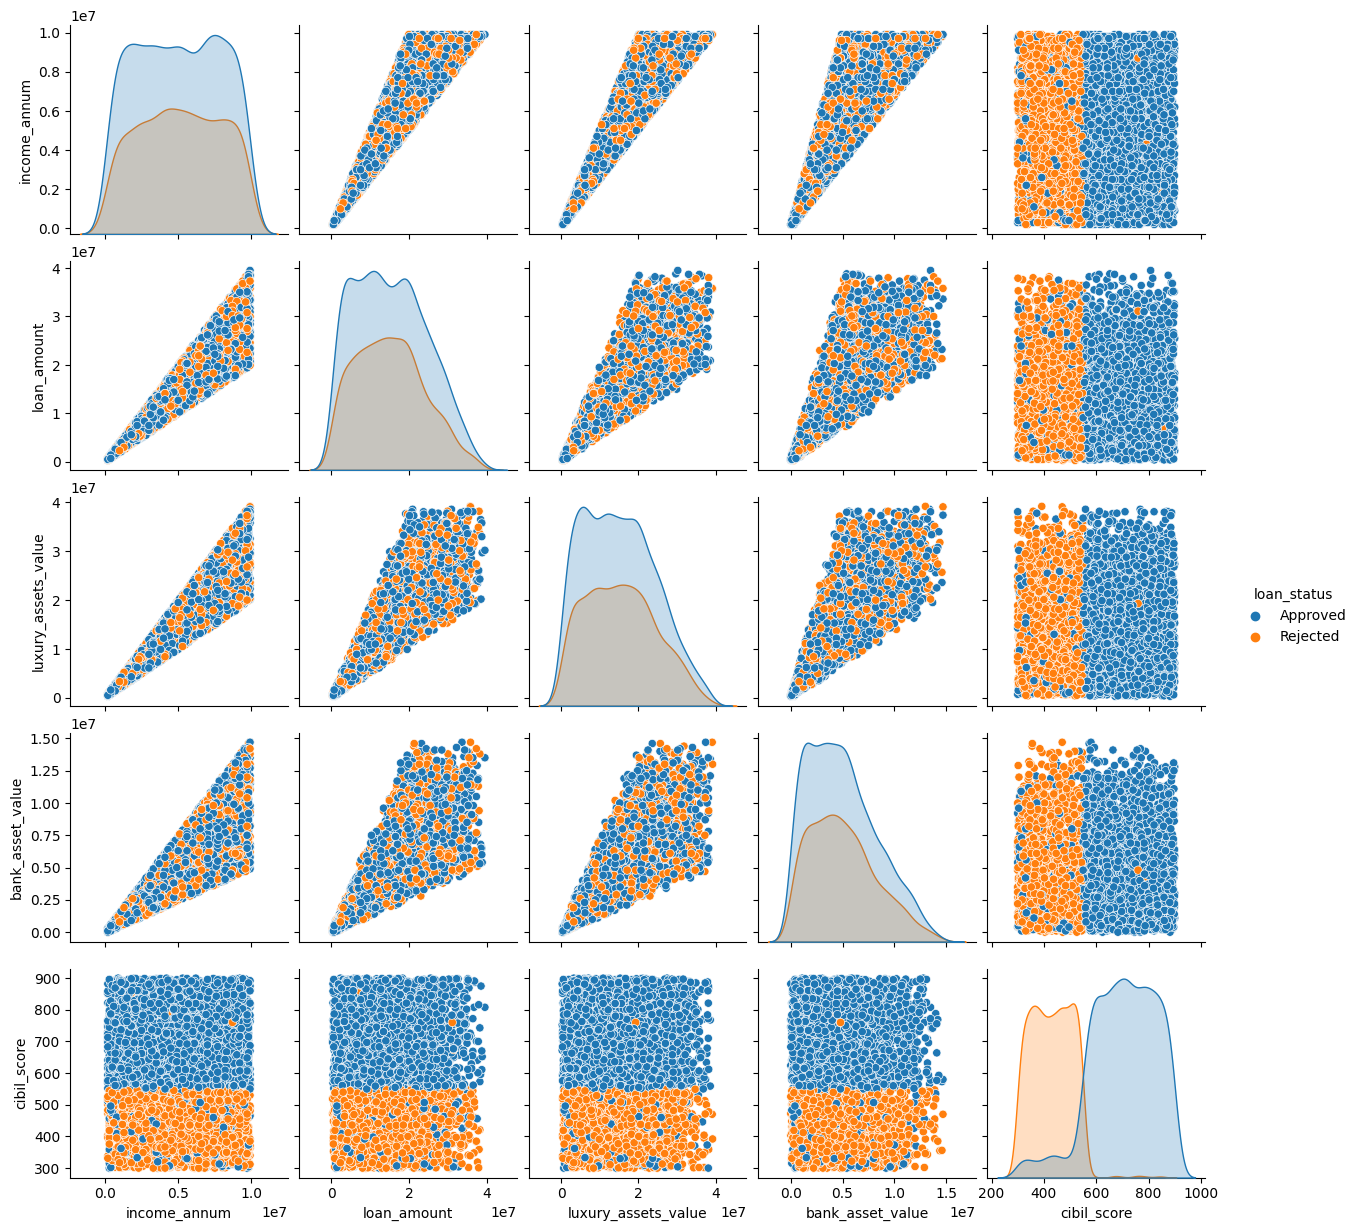

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [ ]:
sns.pairplot(data=df[['income_annum', 'loan_amount', 'luxury_assets_value', 'bank_asset_value', 'loan_status', 'cibil_score']], hue='loan_status')
plt.show()
plt.figure(figsize=(10, 8))

<Axes: xlabel='bank_asset_value', ylabel='cibil_score'>

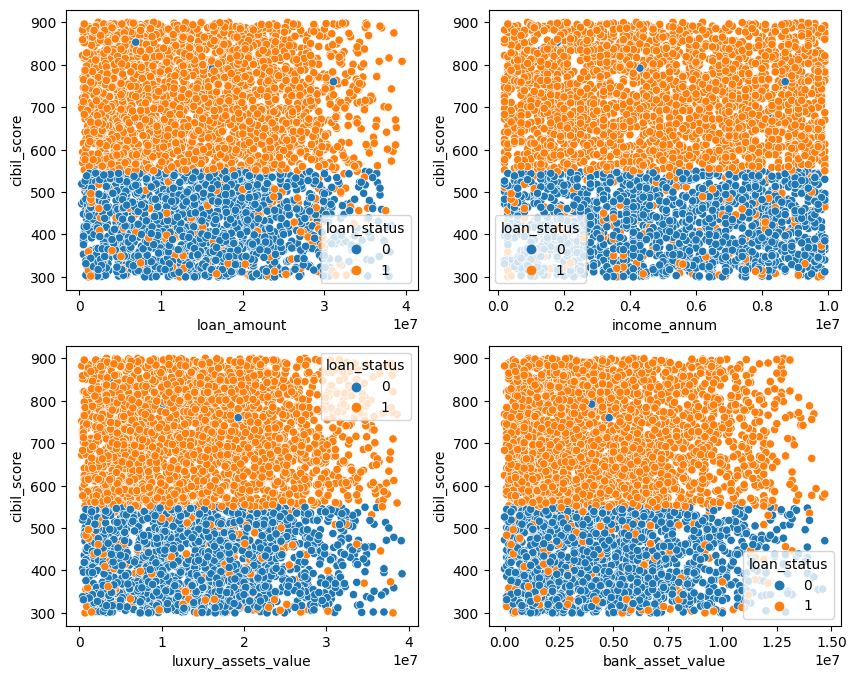

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,8))
sns.scatterplot(x=df['loan_amount'], y=df['cibil_score'], hue=df['loan_status'],ax=ax1)
sns.scatterplot(x=df['income_annum'], y=df['cibil_score'], hue=df['loan_status'],ax=ax2)
sns.scatterplot(x=df['luxury_assets_value'], y=df['cibil_score'], hue=df['loan_status'],ax=ax3)
sns.scatterplot(x=df['bank_asset_value'], y=df['cibil_score'], hue=df['loan_status'],ax=ax4)

0: Rejected, 1:Approved

## Step 7: Baseline Model and Feature Importance Checking
We will train a logistic regression here to get the baseline model perforamnce.

### Then, to objectively understand the original feature importance, we will train a random forest model to quantify the feature importances.

Note that we will not train a logistic regression model to get the feature importance, because the coefficients given by logistic regression are not directly comparable to the feature importances given by Random Forests as the features are not normalized in this case (meaning that features with large scales may have small coefficients even if they are influential to the predictions of the target variable)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
log = LogisticRegression()

df['loan_status'] = df['loan_status'].replace( {'Approved': 1, 'Rejected': 0})
log.fit(df['cibil_score'].values.reshape(-1, 1), df['loan_status'])
pred = log.predict(df[['cibil_score']])

print('result of logsitic regression on cibil_score:')
print(accuracy_score(pred,df['loan_status']))
print(f1_score(pred,df['loan_status']))
print(precision_score(pred,df['loan_status']))
print(recall_score(pred,df['loan_status']))



result of logsitic regression on cibil_score:
0.9177080877151615
0.934088762983947
0.9367424242424243
0.9314500941619586


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Unsurprisingly, the baseline model trained only on the feature 'cibil_score' performs very well, with accuracy score being 0.92 and f1 score being 0.93, which supports our conclusion before that 'cibil_score' is a strong differentiator for the records whose 'loan_status' is approved, and the records whose 'loan_status' is rejected.

However, this may implies that 'cibil_score' is highly correlated with the target variable, which means that the 'cibil_score' can be a 'synonym' of the target variable. Hence, we may need to drop out this feature to ensure the meaningfulness of our task

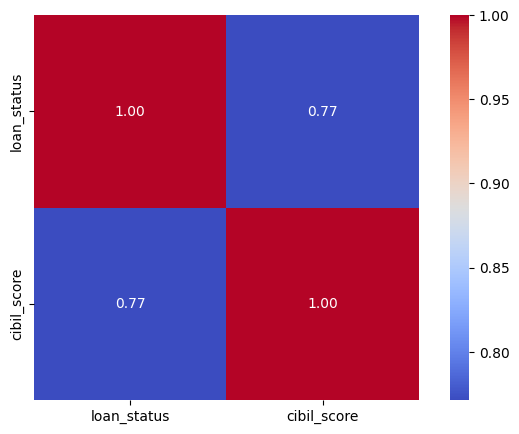

In [ ]:
# check the correlation between loan_status and cibil_score
plt.figure(figsize=(8, 5))
sns.heatmap(df[['loan_status','cibil_score']].corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)

plt.show()


Now, let's see the feature importances given out by the random forest model without excluding the 'cibil_score' feature for now as we are also interested in if the feature will lead to overfitting (the model might rely too heavily on this feature and not learn any other useful patterns in the data.)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('loan_status',axis=1)
y = df['loan_status']
X['education'] = X['education'].replace( {'Graduate': 1, 'Not Graduate': 0})
X['self_employed'] = X['self_employed'].replace( {'Yes': 1, 'No': 0})

rf = RandomForestClassifier(n_estimators = 3, max_depth=3)


rf.fit(X,y)

pred = rf.predict(X)

print(accuracy_score(pred,y))
print(f1_score(pred,y))
print(precision_score(pred,y))
print(recall_score(pred,y))


0.9585003536901674
0.9677301063439677
0.9996212121212121
0.9378109452736318


Interestingly, even we have constrained the Random Forest model to only have 3 estimators with each having a maximal depth of 3, we still receive a high accuracy and f1 scores for solving the task, which may imply that the given machine learning task is easily solvable with simple models

Now let's check below feature importances

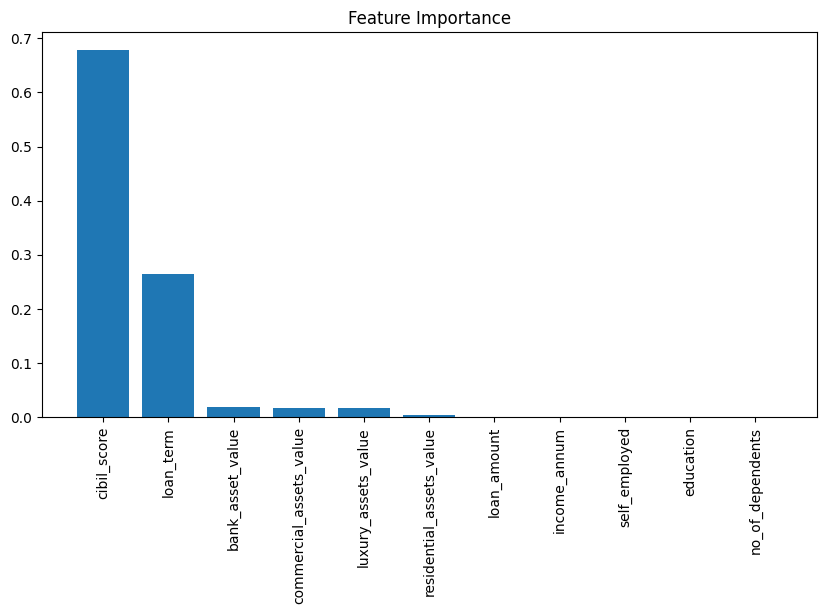

Index(['cibil_score', 'loan_term', 'bank_asset_value',
       'commercial_assets_value', 'luxury_assets_value',
       'residential_assets_value', 'loan_amount', 'income_annum',
       'self_employed', 'education', 'no_of_dependents'],
      dtype='object')
[6.77380111e-01 2.64742417e-01 1.90940258e-02 1.68584637e-02
 1.62738440e-02 4.31467667e-03 1.10141346e-03 2.35048460e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [ ]:
# visualize results

# get the feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order and get their indices
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(feature_names[indices], importances[indices])
plt.xticks(feature_names[indices], rotation=90)

plt.show()
print(feature_names[indices])
print(importances[indices])

Again, 'cibil_score' has dominant feature importance (0.96), implying the necessity of dropping out this feature as it will dominate the model training, leading to potential overfitting.

Let's check the feature importance again if the training data exclude 'cibil_score'

In [ ]:
test = X.drop('cibil_score',axis=1)


rf = RandomForestClassifier(n_estimators = 3, max_depth=3)


rf.fit(test,y)

pred = rf.predict(test)
print('evaluation score without cibil_score')
print(accuracy_score(pred,y))
print(f1_score(pred,y))
print(precision_score(pred,y))
print(recall_score(pred,y))

evaluation score without cibil_score
0.6260315963216223
0.7676530911221798
0.9924242424242424
0.6258958432871476


As we can see from the evaluation score above and from below feature importance, now the random forest model has less reliance / preferance on any particular feature as no feature has dominant importance.

According to the above evaluation score, it is interesting to see that the precision is as high as 0.98 while the recall is only around 0.62, indicating a low false positive rate but high false negative rate. In other words, this means that the model failed to identify most of the positive cases in the data (failed to identify as many records whose loan status is approved as possible), but the accuracy / reliability of each positive predicition is high. According to the f1 score (0.77), the general model performance is satisfactory and the feature importances it yields should be reliable as well

As shown by the below feature importances, it is clear that the 'loan term' feature is the most important feature after excluding 'cibil_score', followed by 'luxury_assets_value', 'commercial_assets_value', and 'income_annum'. It is noteworthy that the feature 'self_employed' and 'education' nearly contributed nothing to the model training (thus have 0 feature importance), so we may choose to drop out those 2 features to reduce the complexity of the model later

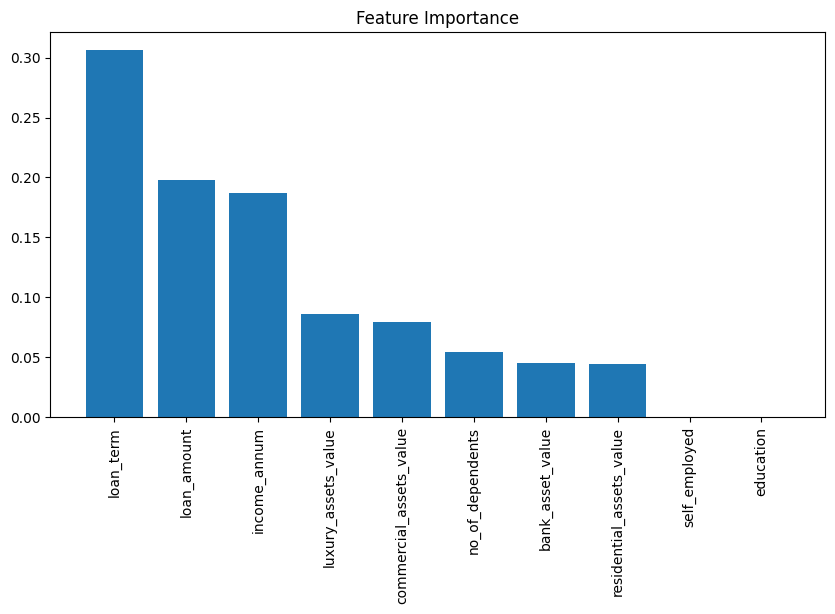

Index(['loan_term', 'loan_amount', 'income_annum', 'luxury_assets_value',
       'commercial_assets_value', 'no_of_dependents', 'bank_asset_value',
       'residential_assets_value', 'self_employed', 'education'],
      dtype='object')
[0.30592317 0.19801973 0.18669624 0.08620945 0.07910767 0.05436988
 0.04545516 0.04421871 0.         0.        ]


In [ ]:
# visualize results

# get the feature importance
importances = rf.feature_importances_
feature_names = test.columns

# Sort feature importances in descending order and get their indices
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(feature_names[indices], importances[indices])
plt.xticks(feature_names[indices], rotation=90)

plt.show()
print(feature_names[indices])
print(importances[indices])


## Step 8, testing

In [ ]:
from scipy import stats

Income_annum_Approved= df[df['loan_status'] == 1]['income_annum']
Income_annum_Rejected= df[df['loan_status'] == 0]['income_annum']

t_stat_Income_annum, p_val_Income_annum = stats.ttest_ind(Income_annum_Approved, Income_annum_Rejected)

print(f"F-statistict Income_annum: {t_stat_Income_annum}")
print(f"P-value Income_annum: {p_val_Income_annum}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

loan_amount_Approved= df[df['loan_status'] == 1]['loan_amount']
loan_amount_Rejected= df[df['loan_status'] == 0]['loan_amount']

t_stat_loan_amount, p_val_loan_amount = stats.ttest_ind(loan_amount_Approved, loan_amount_Rejected)

print(f"F-statistic loan_amount: {t_stat_loan_amount}")
print(f"P-value loan_amount: {p_val_loan_amount}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

luxury_assets_valu_Approved= df[df['loan_status'] == 1]['luxury_assets_value']
luxury_assets_valu_Rejected= df[df['loan_status'] == 0]['luxury_assets_value']

t_stat_luxury_assets_valu, p_val_luxury_assets_valu = stats.ttest_ind(luxury_assets_valu_Approved, luxury_assets_valu_Rejected)

print(f"F-statistict luxury_assets_value: {t_stat_luxury_assets_valu}")
print(f"P-value luxury_assets_value: {p_val_luxury_assets_valu}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

bank_asset_value_Approved= df[df['loan_status'] == 1]['bank_asset_value']
bank_asset_value_Rejected= df[df['loan_status'] == 0]['bank_asset_value']

t_stat_bank_asset_value, p_val_bank_asset_value = stats.ttest_ind(bank_asset_value_Approved, bank_asset_value_Rejected)

print(f"F-statistict bank_asset_value: {t_stat_bank_asset_value}")
print(f"P-value bank_asset_value: {p_val_bank_asset_value}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

cibil_score_Approved= df[df['loan_status'] == 1]['cibil_score']
cibil_score_Rejected= df[df['loan_status'] == 0]['cibil_score']

t_stat_cibil_score, p_val_cibil_score = stats.ttest_ind(cibil_score_Approved, cibil_score_Rejected)

print(f"F-statistict cibil_score: {t_stat_cibil_score}")
print(f"P-value cibil_score: {p_val_cibil_score}")
print("Since the P-value is lower than 0.05, so we can reject the Null Hypothesis, which means that the alternative hypothesis (the two groups have significant difference) can be accepted")
print(df.groupby('loan_status')[['cibil_score']].mean())
print("The range of means for each group is given here, the APPROVED group is at 704. and the REJECTED group is at 429. Which indicates which group the scores will be in when they are within these ranges.")
print('-------------------------------------------')

no_of_dependents_Approved= df[df['loan_status'] == 1]['no_of_dependents']
no_of_dependents_Rejected= df[df['loan_status'] == 0]['no_of_dependents']

t_stat_no_of_dependents, p_val_no_of_dependents = stats.ttest_ind(no_of_dependents_Approved, no_of_dependents_Rejected)

print(f"F-statistict no_of_dependents: {t_stat_no_of_dependents}")
print(f"P-value no_of_dependents: {p_val_no_of_dependents}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

loan_term_Approved= df[df['loan_status'] == 1]['loan_term']
loan_term_Rejected= df[df['loan_status'] == 0]['loan_term']

t_stat_loan_term, p_val_loan_term = stats.ttest_ind(loan_term_Approved, loan_term_Rejected)

print(f"F-statistict loan_term: {t_stat_loan_term}")
print(f"P-value loan_term: {p_val_loan_term}")
print("Since the P-value is lower than 0.05, so we can reject the Null Hypothesis, which means that the alternative hypothesis (the two groups have significant difference) can be accepted")
print(df.groupby('loan_status')[['loan_term']].mean())
print("The range of means for each group is given here, the APPROVED group is at 10. and the REJECTED group is at 11. Which indicates which group the loan term will be in when they are within these ranges.")
print('-------------------------------------------')


F-statistict Income_annum: -1.1744141054885473
P-value Income_annum: 0.24029516865450237
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)
-------------------------------------------
F-statistic loan_amount: 0.8906171448573518
P-value loan_amount: 0.37318514243407674
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)
-------------------------------------------
F-statistict luxury_assets_value: -1.1946893023610032
P-value luxury_assets_value: 0.23227528321972962
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)
-------------------------------------------
F-statistict bank_asset_value: -0.561718697306362
P-value bank_asset_value: 0.574

Above, We have used t-test for statistical testing to identify the features that are statistically different between the records with success loan approval and the records with failed application.

Since both Cibil_score and loan_term p-values are lower than 0.05, the company can conclude that the loan terms and the credibility scores of those whose loan applications are approved are statistically different from the loan terms and the credibility scores of those whose loan applications are rejected. This conclusion may also help the business to identify potential high-risk or low-risk customers and tailor its services accordingly to manage risk and improve the overall business performance based on their differences.

Moreover, the statistical t-test also suggest that the feature 'cibil_score' and 'loan_term' should be included in the training set as they are informative features (differentiators) to the model training

 For cibil_score, the scores have a significant impact on the loan_status, same for the loan_term.




In [ ]:
from scipy import stats

Income_annum_Approved= df[df['education'] == 'Graduate']['income_annum']
Income_annum_Rejected= df[df['education'] == 'Not Graduate']['income_annum']

t_stat_Income_annum, p_val_Income_annum = stats.ttest_ind(Income_annum_Approved, Income_annum_Rejected)

print(f"F-statistict Income_annum: {t_stat_Income_annum}")
print(f"P-value Income_annum: {p_val_Income_annum}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

loan_amount_Approved= df[df['education'] == 'Graduate']['loan_amount']
loan_amount_Rejected= df[df['education'] == 'Not Graduate']['loan_amount']

t_stat_loan_amount, p_val_loan_amount = stats.ttest_ind(loan_amount_Approved, loan_amount_Rejected)

print(f"F-statistic loan_amount: {t_stat_loan_amount}")
print(f"P-value loan_amount: {p_val_loan_amount}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

luxury_assets_valu_Approved= df[df['education'] == 'Graduate']['luxury_assets_value']
luxury_assets_valu_Rejected= df[df['education'] == 'Not Graduate']['luxury_assets_value']

t_stat_luxury_assets_valu, p_val_luxury_assets_valu = stats.ttest_ind(luxury_assets_valu_Approved, luxury_assets_valu_Rejected)

print(f"F-statistict luxury_assets_value: {t_stat_luxury_assets_valu}")
print(f"P-value luxury_assets_value: {p_val_luxury_assets_valu}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

bank_asset_value_Approved= df[df['education'] == 'Graduate']['bank_asset_value']
bank_asset_value_Rejected= df[df['education'] == 'Not Graduate']['bank_asset_value']

t_stat_bank_asset_value, p_val_bank_asset_value = stats.ttest_ind(bank_asset_value_Approved, bank_asset_value_Rejected)

print(f"F-statistict bank_asset_value: {t_stat_bank_asset_value}")
print(f"P-value bank_asset_value: {p_val_bank_asset_value}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

cibil_score_Approved= df[df['education'] == 'Graduate']['cibil_score']
cibil_score_Rejected= df[df['education'] == 'Not Graduate']['cibil_score']

t_stat_cibil_score, p_val_cibil_score = stats.ttest_ind(cibil_score_Approved, cibil_score_Rejected)

print(f"F-statistict cibil_score: {t_stat_cibil_score}")
print(f"P-value cibil_score: {p_val_cibil_score}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

no_of_dependents_Approved= df[df['education'] == 'Graduate']['no_of_dependents']
no_of_dependents_Rejected= df[df['education'] == 'Not Graduate']['no_of_dependents']

t_stat_no_of_dependents, p_val_no_of_dependents = stats.ttest_ind(no_of_dependents_Approved, no_of_dependents_Rejected)

print(f"F-statistict no_of_dependents: {t_stat_no_of_dependents}")
print(f"P-value no_of_dependents: {p_val_no_of_dependents}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

loan_term_Approved= df[df['education'] == 'Graduate']['loan_term']
loan_term_Rejected= df[df['education'] == 'Not Graduate']['loan_term']

t_stat_loan_term, p_val_loan_term = stats.ttest_ind(loan_term_Approved, loan_term_Rejected)

print(f"F-statistict loan_term: {t_stat_loan_term}")
print(f"P-value loan_term: {p_val_loan_term}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

F-statistict Income_annum: 0.8245926531969213
P-value Income_annum: 0.40964928989272853
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)
-------------------------------------------
F-statistic loan_amount: 0.7666505667281763
P-value loan_amount: 0.44333199403019197
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)
-------------------------------------------
F-statistict luxury_assets_value: 0.8743614617044507
P-value luxury_assets_value: 0.3819709711362943
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)
-------------------------------------------
F-statistict bank_asset_value: 0.6918281300012691
P-value bank_asset_value: 0.489083

Above, We have used t-test for statistical testing to identify the features that are statistically different between the education status, Graduate and No Graduate.

Since the p-values of all the characteristics are less than 0.05, we can reach the conclusion that none of these characteristics have a crucial association with education.

Above, all groups between education status are no significantly difference.

In [ ]:
from scipy import stats

Income_annum_Approved= df[df['self_employed'] == 'No']['income_annum']
Income_annum_Rejected= df[df['self_employed'] == 'Yes']['income_annum']

t_stat_Income_annum, p_val_Income_annum = stats.ttest_ind(Income_annum_Approved, Income_annum_Rejected)

print(f"F-statistict Income_annum: {t_stat_Income_annum}")
print(f"P-value Income_annum: {p_val_Income_annum}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

loan_amount_Approved= df[df['self_employed'] == 'No']['loan_amount']
loan_amount_Rejected= df[df['self_employed'] == 'Yes']['loan_amount']

t_stat_loan_amount, p_val_loan_amount = stats.ttest_ind(loan_amount_Approved, loan_amount_Rejected)

print(f"F-statistic loan_amount: {t_stat_loan_amount}")
print(f"P-value loan_amount: {p_val_loan_amount}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

luxury_assets_valu_Approved= df[df['self_employed'] == 'No']['luxury_assets_value']
luxury_assets_valu_Rejected= df[df['self_employed'] == 'Yes']['luxury_assets_value']

t_stat_luxury_assets_valu, p_val_luxury_assets_valu = stats.ttest_ind(luxury_assets_valu_Approved, luxury_assets_valu_Rejected)

print(f"F-statistict luxury_assets_value: {t_stat_luxury_assets_valu}")
print(f"P-value luxury_assets_value: {p_val_luxury_assets_valu}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

bank_asset_value_Approved= df[df['self_employed'] == 'No']['bank_asset_value']
bank_asset_value_Rejected= df[df['self_employed'] == 'Yes']['bank_asset_value']

t_stat_bank_asset_value, p_val_bank_asset_value = stats.ttest_ind(bank_asset_value_Approved, bank_asset_value_Rejected)

print(f"F-statistict bank_asset_value: {t_stat_bank_asset_value}")
print(f"P-value bank_asset_value: {p_val_bank_asset_value}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

cibil_score_Approved= df[df['self_employed'] == 'No']['cibil_score']
cibil_score_Rejected= df[df['self_employed'] == 'Yes']['cibil_score']

t_stat_cibil_score, p_val_cibil_score = stats.ttest_ind(cibil_score_Approved, cibil_score_Rejected)

print(f"F-statistict cibil_score: {t_stat_cibil_score}")
print(f"P-value cibil_score: {p_val_cibil_score}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

no_of_dependents_Approved= df[df['self_employed'] == 'No']['no_of_dependents']
no_of_dependents_Rejected= df[df['self_employed'] == 'Yes']['no_of_dependents']

t_stat_no_of_dependents, p_val_no_of_dependents = stats.ttest_ind(no_of_dependents_Approved, no_of_dependents_Rejected)

print(f"F-statistict no_of_dependents: {t_stat_no_of_dependents}")
print(f"P-value no_of_dependents: {p_val_no_of_dependents}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

loan_term_Approved= df[df['self_employed'] == 'No']['loan_term']
loan_term_Rejected= df[df['self_employed'] == 'Yes']['loan_term']

t_stat_loan_term, p_val_loan_term = stats.ttest_ind(loan_term_Approved, loan_term_Rejected)

print(f"F-statistict loan_term: {t_stat_loan_term}")
print(f"P-value loan_term: {p_val_loan_term}")
print("Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)")

print('-------------------------------------------')

F-statistict Income_annum: -0.1508853049844862
P-value Income_annum: 0.8800733720106488
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)
-------------------------------------------
F-statistic loan_amount: -0.08094105938939011
P-value loan_amount: 0.9354926474782969
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)
-------------------------------------------
F-statistict luxury_assets_value: -0.2585313928666854
P-value luxury_assets_value: 0.7960093758560548
Since the P-value is not lower than 0.05, so we can't reject the Null Hypothesis(Which means that there is no significant difference between the means of the two groups)
-------------------------------------------
F-statistict bank_asset_value: 0.012536334748137253
P-value bank_asset_value: 0.98

Above, We have used t-test for statistical testing to identify the features that are statistically different between the self_employed status, Yes and No.

Since the p-values of all the characteristics are less than 0.05, we can reach the conclusion that none of these characteristics have a crucial association with self_employed.

# Feature Engineering & Standardization & Normalization

In [ ]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer

In [ ]:
# Feature Engineering
# #indicating the ability to repay the loan based on income.
X['loan_to_term_ratio'] = (df['loan_amount'] / df['loan_term']).astype(int)
X['loan_to_term_ratio'].replace( {np.inf: 0})
#giving an idea of the loan payment per loan term.

skewed = ['loan_amount', 'residential_assets_value','commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
non_skewed = ['no_of_dependents', 'income_annum', 'loan_term', 'loan_to_term_ratio']


In [ ]:
X[skewed + non_skewed].isnull().sum()

loan_amount                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
no_of_dependents            0
income_annum                0
loan_term                   0
loan_to_term_ratio          0
dtype: int64

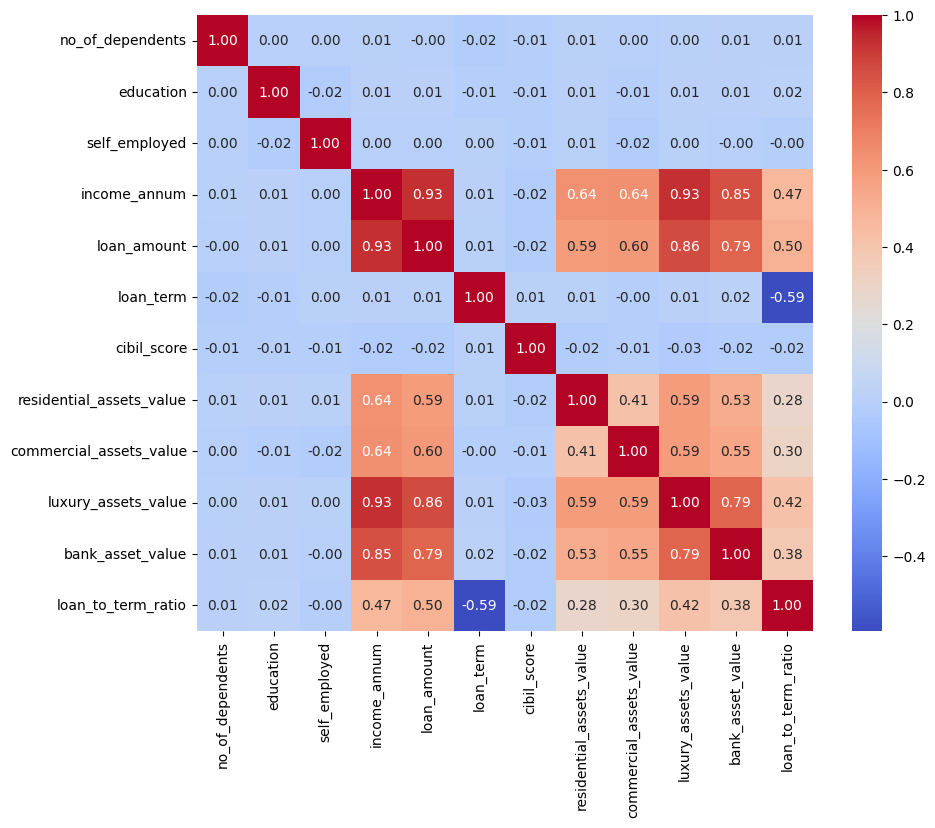

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

#### As indicated by above correlation matrix, the generated feature 'loan_to_term_ratio', which describes the amount of instalment required per unit of time, is moderately correlated with many other training features like 'bank_asset_value' and 'luxury_assets_value', meaning that this feature is a good aggregation or representation of certain existing data feature values, and may yield a good model performance

#### Also, we have observed certain right-skewness within the distributions of certain features like 'residential_assets_value', 'commercial_assets_value', and etc, as shown below. To reduce the impacts of potential outliers in those right-skewed features on the performances of the models who are sensitive to outliers like SVM, we will use simple square root transformation on the skewed features to make them normally distributed.


#### Note that the feature 'education' and 'self_employed' are not included in the training set as we have demonstrated that they are not important features to the model performance according to our EDA section and statistical testing

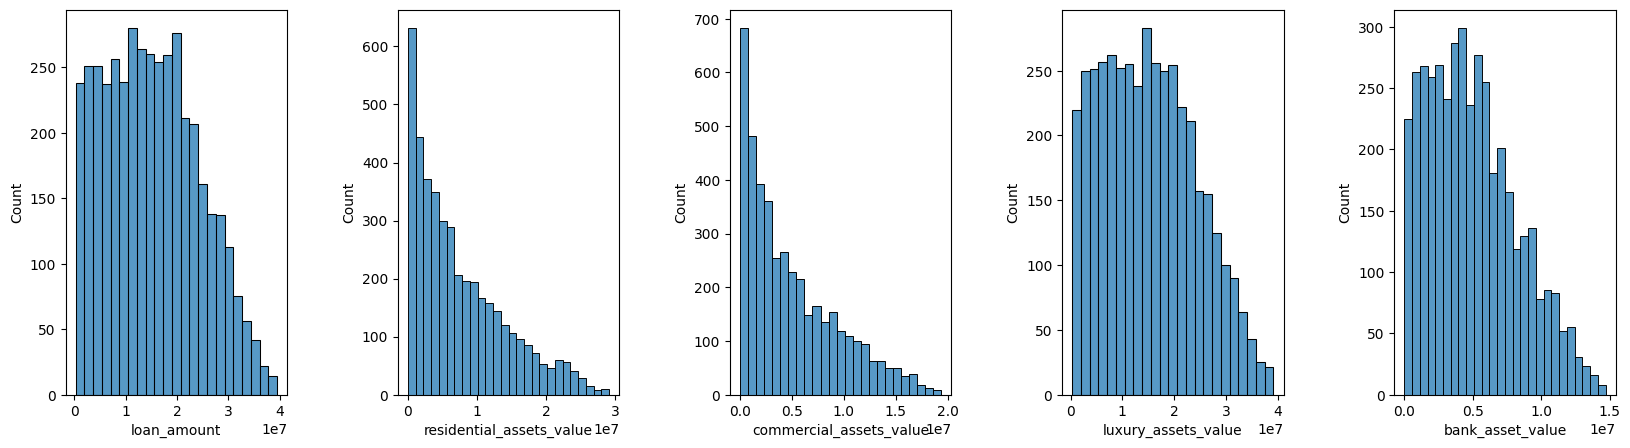

In [ ]:
# observe the right skewed distribution of features
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for idx, i in enumerate(skewed):
    sns.histplot(data = df, x = i, ax=axs[idx])
    # Set the y-axis tick formatter to disable scientific notation (le7)
    #axs[idx].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:g}'))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [ ]:
# transform those features using square root
sqrt_transformer = FunctionTransformer(np.sqrt)
X[skewed] = sqrt_transformer.fit_transform(X[skewed])

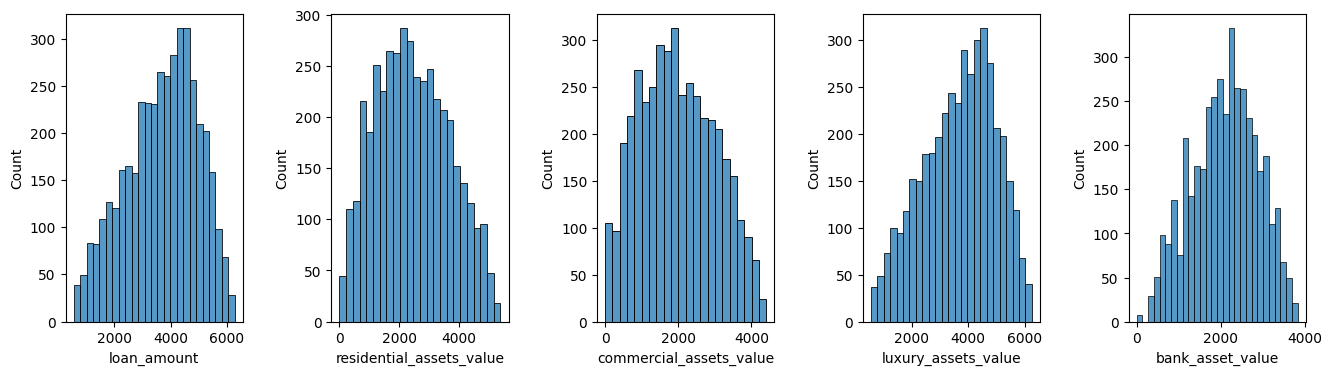

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
for idx, i in enumerate(skewed):
    sns.histplot(data = X, x = i, ax=axs[idx])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

#### As we can see, after the square root transformation, the right-skewed features are now approximately normally distributed, and we can proceed to the data standardization. We will train a MinMaxScaler on the training set only as the MinMaxScaler will not alter the original feature value distributions and the MinMaxScaler should not be exposed to the testing set to ensure that the testing set actually simulates the unseen data (so we will not train the MinMaxScaler() until we have completed the train test split)

In [ ]:
scaler = MinMaxScaler()


# Model Training & Evaluation
### Re-sampling Method (SMOTE) to balance the imbalanced data (obtaining equal number of records with 'loan_status' being approved and being rejected)

Note: cibil_score is dropped out

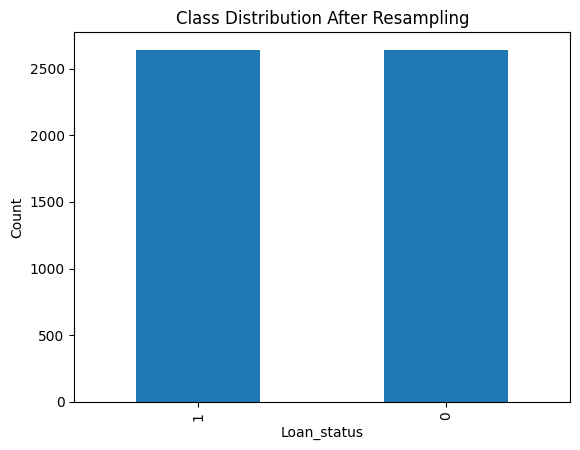

In [ ]:
# note that you should do resampling after the train test split as the resampling should only be applied on the training set
from imblearn.over_sampling import SMOTE

# X = X.drop('cibil_score', axis=1)
# ensure no records have missing values

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X[skewed + non_skewed], y)

# check target label distribution
y_resampled.value_counts().plot(kind='bar')
plt.xlabel('Loan_status')
plt.ylabel('Count')
plt.title('Class Distribution After Resampling')
plt.show()

Train test split with 20% records being placed in the testing set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)


### Training 3 models with random search CV on the hyper-parameter tuning
  1. SVM
  2. XGBoosting
  3. Logistic Regression

### After training and tuning the 3 models, we will use a simple ensemble method to combine the results produced by the 3 models, which is called the Majority Voting, namely each classifier will votes for a class, and the final prediction of a record is determined by the class label with the most votes

In [ ]:
# standardizing
x_train_scaled  = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=[skewed + non_skewed])


x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=[skewed + non_skewed])
x_test_scaled

loan_amount residential_assets_value commercial_assets_value  \
0       0.474687                 0.326388                0.393242   
1       0.811905                 0.762073                0.749570   
2       0.873435                 0.442579                0.714359   
3       0.532985                 0.748423                0.507673   
4       0.185584                 0.117242                0.189954   
...          ...                      ...                     ...   
1051    0.576364                 0.494680                0.474983   
1052    0.990250                 0.892889                0.989637   
1053    0.791376                 0.660069                0.410374   
1054    0.244308                 0.310193                0.000000   
1055    0.637842                 0.902459                0.522681   

     luxury_assets_value bank_asset_value no_of_dependents income_annum  \
0               0.380268         0.368856              0.4     0.298969   
1               0.789727         0.755929              0.8     0.804124   
2               0.682971         0.709508              0.4     0.855670   
3               0.510457         0.508432              0.2     0.587629   
4               0.202199         0.247436              0.2     0.072165   
...                  ...              ...              ...          ...   
1051            0.511969         0.640518              0.0     0.479017   
1052            0.858011         0.606092              0.0     0.989691   
1053            0.918558         0.774364              0.2     0.917526   
1054            0.307084         0.308607              0.4     0.134021   
1055            0.841815         0.534522              0.2     0.835052   

     loan_term loan_to_term_ratio  
0     0.111111           0.137574  
1     0.333333           0.174425  
2     0.222222           0.265581  
3     0.000000           0.335402  
4     0.111111           0.032842  
...        ...                ...  
1051  0.444444           0.069647  
1052  0.333333           0.250065  
1053  0.888889           0.070303  
1054  0.111111           0.048358  
1055  0.444444           0.090768  

[1056 rows x 9 columns]

# SVM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define the hyperparameter configuration spaces
svm_params = { # the range of hyper-parameters we want to search
    'kernel':['linear','poly', 'rbf', 'sigmoid'],
    'gamma': ['auto','scale'],
    'degree': range(1,10), # set degree for poly kernel use only, the default value is 3
    'coef0': range(0,10), #  only used in ‘poly’ and ‘sigmoid’, default value is 0,
    'tol': [1e-4,1e-3], # default value is 1e-3
#    'decision_function_shape': ['ovr','ovo'], # default value is 'ovr', and 'ovo' cannot be used when is 'break_ties=True'
#    'classifier__break_ties': [True, False], # This parameter can only be 'True' when decision_function_shape='ovr', so the default value is 'False'. However, tuning this parameter is redundant as 'False' turns out to be the best parameter setting for 'break_ties'
    'cache_size': [200,300], # Specify the size of the kernel cache size (MB), the default value is 200
}

# SVM model
svm = SVC(max_iter=5000) # set max_iter=5000 to avoid infinite looping
svm_search = RandomizedSearchCV(svm, svm_params, cv=5, scoring = 'f1', n_iter = 5)
svm_search.fit(x_train_scaled, y_train)

print('best training score {}'.format(svm_search.best_score_))

best training score 0.4883939042693924


In [ ]:
# see the best hyper-parameter
svm_search.best_params_

{'tol': 0.0001,
 'kernel': 'rbf',
 'gamma': 'scale',
 'degree': 9,
 'coef0': 3,
 'cache_size': 300}

In [ ]:
# evaluation
pred = svm_search.best_estimator_.predict(x_test_scaled)

print('Result of SVM on testing set:')
print(accuracy_score(pred,y_test))
print(f1_score(pred,y_test))
print(precision_score(pred,y_test))
print(recall_score(pred,y_test))


Result of SVM on testing set:
0.5899621212121212
0.5308775731310942
0.4640151515151515
0.620253164556962


# XGBoosting

In [ ]:
xgb_params =  {
    'learning_rate':np.arange(0,1,0.1),
    'n_estimators': range(0,1000, 10),
    'max_depth': range(1,1000,10),
    'gamma': np.arange(0.01,0.25, 0.01)
}


# XGBoost model
xgb = XGBClassifier()
xgb_search = RandomizedSearchCV(xgb, xgb_params, cv=5, scoring = 'f1', n_iter = 5)
xgb_search.fit(x_train_scaled, y_train)

print('best training score {}'.format(xgb_search.best_score_))

best training score 0.6349281635556305


In [ ]:
# see the best hyper-parameter
xgb_search.best_params_

{'n_estimators': 220, 'max_depth': 231, 'learning_rate': 0.4, 'gamma': 0.01}

In [ ]:
pred = xgb_search.best_estimator_.predict(x_test_scaled)

print('Result of XGB on testing set:')
print(accuracy_score(pred,y_test))
print(f1_score(pred,y_test))
print(precision_score(pred,y_test))
print(recall_score(pred,y_test))

Result of XGB on testing set:
0.6496212121212122
0.6365422396856583
0.6136363636363636
0.6612244897959184


# Logistic Regression
One of the baseline model we have trained before, simply train it again with the full feature space to enable the majority voting of ensembling

In [ ]:
lr_params = {
    'C': np.arange(0,1,0.1),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Logistic Regression model
lr = LogisticRegression()
lr_search = RandomizedSearchCV(lr, lr_params, cv=5, scoring = 'f1', n_iter = 10)
lr_search.fit(x_train_scaled, y_train)

print('best training score {}'.format(lr_search.best_score_))

best training score 0.52988766161208


In [ ]:
# see the best hyper-parameter
lr_search.best_params_

{'solver': 'liblinear', 'C': 0.2}

In [ ]:
pred = lr_search.best_estimator_.predict(x_test_scaled)

print('Result of Logistic Regression on testing set:')
print(accuracy_score(pred,y_test))
print(f1_score(pred,y_test))
print(precision_score(pred,y_test))
print(recall_score(pred,y_test))

Result of Logistic Regression on testing set:
0.5293560606060606
0.5005025125628141
0.4715909090909091
0.5331905781584583


# Ensemble: Majority Voting

### Note that VotingClassifier will not retrain the supplied individual models, but fitting the voting classifier itself.









In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', lr_search.best_estimator_),
                ('xgb', xgb_search.best_estimator_),
                ('svm', svm_search.best_estimator_)],
                voting='hard',
                #weights = [0.2,0.5,0.3]
)
voting_clf.fit(x_train_scaled, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.2, solver='liblinear')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.01,
                                            gpu_id=None, grow_policy=None,
                                            importanc...
                                            interaction_constraints=None,
                                            learning_rate=0.4, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=231,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=220, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('svm',
                              SVC(cache_size=300, coef0=3, degree=9,
                                  max_iter=5000, tol=0.0001))])

In [ ]:
voting_clf.score
pred = voting_clf.predict(x_test_scaled)

print('Testing result of Majority Voting on testing set:')
print(accuracy_score(pred,y_test))
print(f1_score(pred,y_test))
print(precision_score(pred,y_test))
print(recall_score(pred,y_test))

Testing result of Majority Voting on testing set:
0.5890151515151515
0.5373134328358209
0.4772727272727273
0.6146341463414634


#Conclusion:

Both SVM and Logistic Regression performs poorly on this binary classification task. An accuracy score yielded by the 2 models around 50% indicates that the prediction is no better than random guessing, and all the 3 models perform even worse than the Random Forest baseline model performance (with 0.77 f1 score). This result may attributed to lack of further hyper-paramater tuning (like tuning the threshold for logistic regression), the normalization we have applied before training, or the potential overfitting of random forest on the entire dataset.

The result yielded by the majority voting ensenbling strategy is even worse than the performance of XGBoosting alone, indicating that the remaining 2 models failed to improve the predictions of Xgboosting further but misleading the prediction direction. This observation may also suggest that more complex ensembling can be considered to be implemented such as stacking (one model trained on the errors of the previously one trained model), or that the 2 models (SVM and Logistic Regression) simply are not well-suited to this dataset or this task.

The reasons of choosing SVM and Logistic Regression is that both of them are similar in nature as they both can produce  decision boundaries or hyperplanes in the input space to complete the classification, while both of their performances should beenfit from normalizing the features. As for the reason of choosing XGBoosting (Extreme Gradient Boosting), which is an ensemble tree-based model that can capture complex patterns and interactions between features (often regarded as  a strong performer on a wide range of ML tasks), is that its structure fundamentally differs from the other 2 models (XGBoost is based on the gradient boosting framework, which is constructing ensembles of decision trees, where each new tree in the ensemble is designed to correct the errors made by the previous trees), which should yield a different performance from the other 2 models due to the different perspectives it may captures from the data.


However, combining the predictions produced by XGBoosting with the predictions yielded by SVM and Logistic Regression using the majority voting can be undesirable, because XGBoosting can produce contradicting predictions with the other 2 due to the different patterns it learned from the data, implying that the weights of the predictions of XGBoosting can be adjusted accordingly in the majority voting based on its performance, or we can simply switch to a more appropriate ensemble method like stacking as aforementioned. Unfortunately, the fact that the majority voting performance is worse than the XGBoost model alone suggests that the predictions of the SVM and Logistic Regression models are actually introducing noises than providing complementary information to the majority voting ensembling, namely that the weights of predictions of SVM and Logistic Regression models can be adjusted as well.


Finally, it's also noteworthy that XGBoosting, like any tree-based model, is less sensitive to feature scaling than SVM and Logistic Regression, so normalization may have less impact on its performance, which may be the reason why XGBoosting outperforms the others (as the feature scaling can be concluded to be compromising the model performance in this case). Thus, the final model we will choose is the XGBoosting



